In [1]:
# pip install yfinance scikit-learn pandas matplotlib


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:

# Step 1: Retrieve historical stock data
ticker = 'AAPL'  # Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Step 2: Preprocess the data
data['Return'] = data['Close'].pct_change()
data['Lagged_Close_1'] = data['Close'].shift(1)
data['Lagged_Close_2'] = data['Close'].shift(2)
data.dropna(inplace=True)

In [ ]:

# Features and target variable
X = data[['Lagged_Close_1', 'Lagged_Close_2']]
y = data['Close']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 5: Make predictions
y_pred = lr.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5.83
R-squared: 0.99


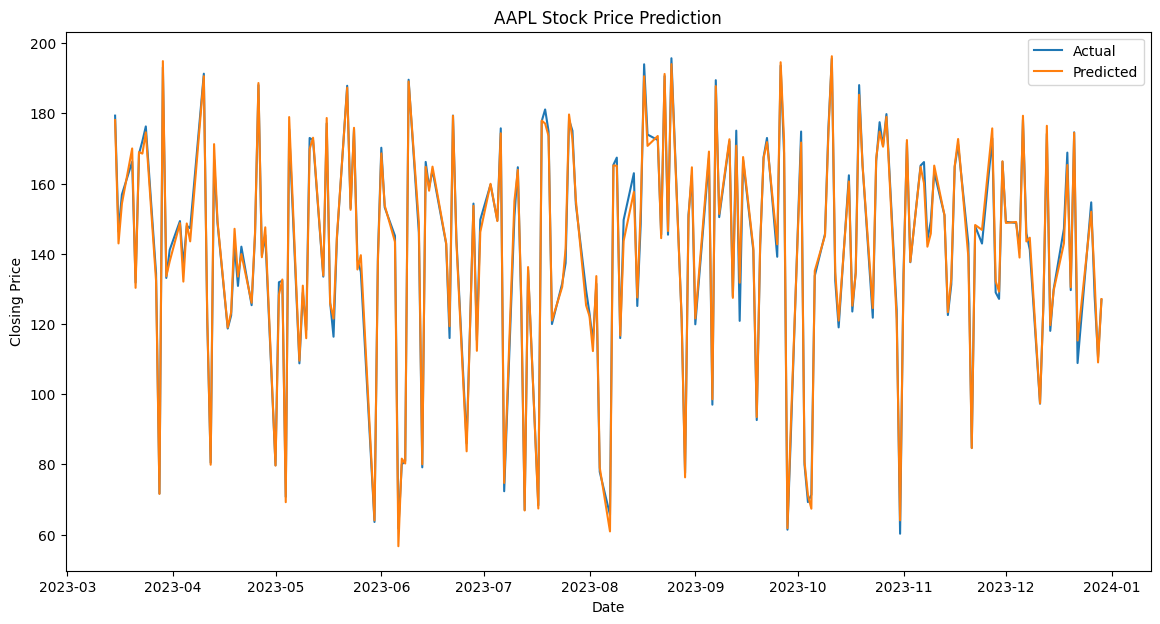

In [ ]:
# Step 7: Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()
